In [1]:
import geopandas as gpd



In [29]:
to_dems = gpd.read_file('toronto_census_all.shp')

to_dems.rename(columns = {'Percentage': 'Percentage of visible minority',
                           'Median tot': 'Median total income of households in 2020 ($)',
                             'Homeowners':'Homeownership rate (%)'}, inplace=True)

to_isos = gpd.read_file('./isochrones_final/isochrones_change_final.shp')
isos_df = to_isos[['DGUID', '30_change', '15_change', '30_2015', '30_2025', '15_2015', '15_2025', '15_increas', '30_increas']].rename(
    columns = {'15_increas': '15_increase', '30_increas': '30_increase'})

to_all = to_dems.merge(isos_df, how = 'right', on = 'DGUID')

In [30]:
import esda
import libpysal as lps

to_all = to_all.to_crs('epsg:3857')

w = lps.weights.Queen.from_dataframe(to_all, use_index=False)

In [31]:
# Global Moran's I Stuff
VMmoransi = esda.Moran(to_all['Percentage of visible minority'], w)
MMHHmoransi = esda.Moran(to_all['Median total income of households in 2020 ($)'], w)
HORmoransi = esda.Moran(to_all['Homeownership rate (%)'],w)

print(f'The Morans I value for VM is {VMmoransi.I}')
print(f'The Morans I value for MMHH is {MMHHmoransi.I}')
print(f'The Morans I value for HOR is {HORmoransi.I}')

print(f'The p-value for VM is {VMmoransi.p_sim}')
print(f'The p-value for MMHH is {MMHHmoransi.p_sim}')
print(f'The p-value for HOR is {HORmoransi.p_sim}')

The Morans I value for VM is 0.5254431786444961
The Morans I value for MMHH is 0.4636222078534422
The Morans I value for HOR is 0.3249445179449491
The p-value for VM is 0.001
The p-value for MMHH is 0.001
The p-value for HOR is 0.001


In [ ]:
# get the local moran's I graphs for relevant columns

MMHHmorans_local = esda.Moran_Local(to_all['Median total income of households in 2020 ($)'], w)
HORmorans_local = esda.Moran_Local(to_all['Homeownership rate (%)'], w)
VMmorans_local = esda.Moran_Local(to_all['Percentage of visible minority'], w)
iso_30_change_local = esda.Moran_Local(to_all['30_change'], w)
iso_30_increase_local = esda.Moran_Local(to_all['30_increase'], w)

<Axes: >

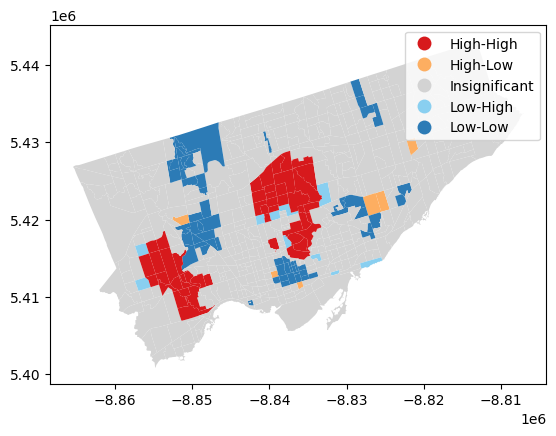

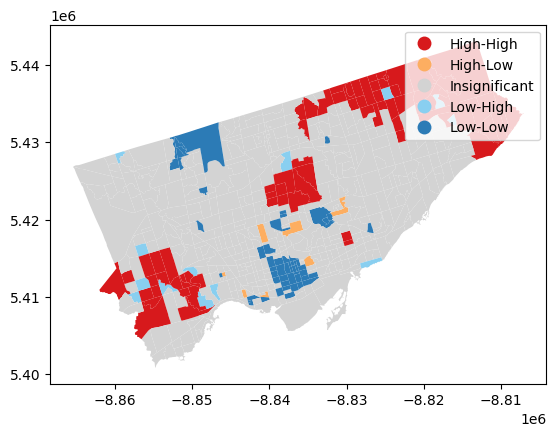

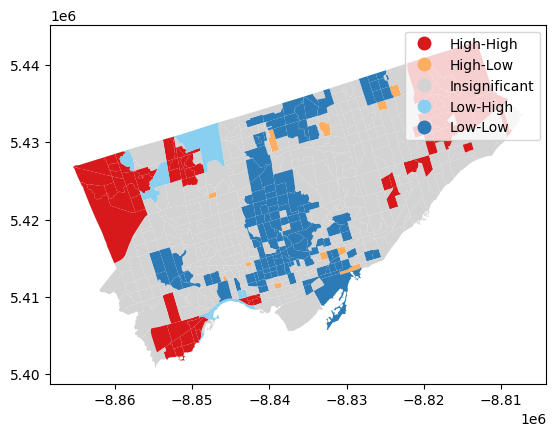

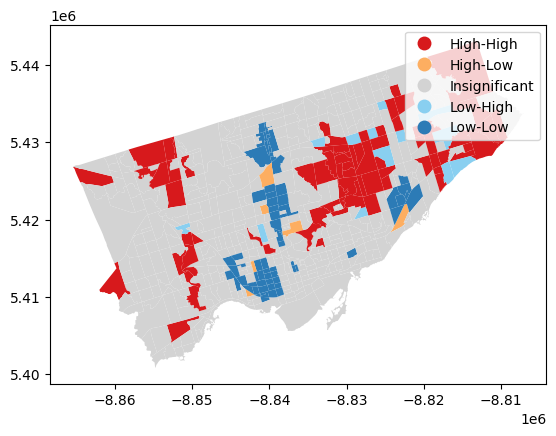

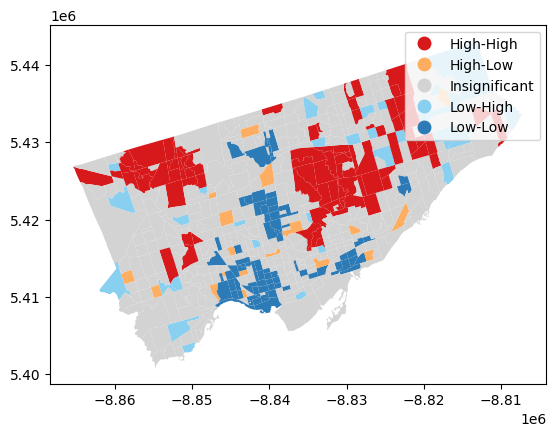

In [ ]:
# look at them!

MMHHmorans_local.plot(to_all, legend = True)
HORmorans_local.plot(to_all, legend = True)
VMmorans_local.plot(to_all, legend = True)
iso_30_change_local.plot(to_all, legend = True)
iso_30_increase_local.plot(to_all, legend = True)

0
Empty GeoDataFrame
Columns: [ESRI_OID, Location, Percentage, DGUID, id, geometry]
Index: []


C:\Users\saman\AppData\Local\Temp\ipykernel_18264\908812981.py:4: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ax = to_all[to_all['30_change'].isna()].plot(color = 'red')
C:\Users\saman\AppData\Local\Temp\ipykernel_18264\908812981.py:8: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  to_ct_2.to_crs(to_all.crs).plot(ax=ax)


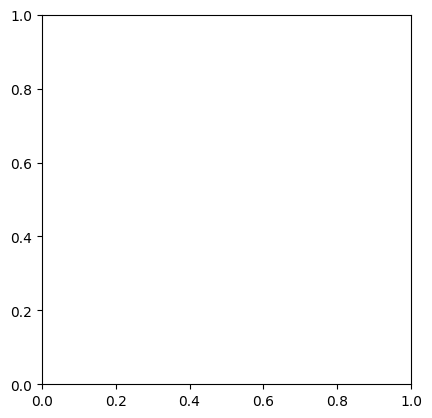